In [8]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from pydataset import data
import acquire
import prepare

In [31]:
titanic = acquire.get_titanic_data()

In [32]:
titanic

,Unnamed: 0,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,886,0,2,male,27.0,0,0,13.0000,S,Second,NaN,Southampton,1
887,887,887,1,1,female,19.0,0,0,30.0000,S,First,B,Southampton,1
888,888,888,0,3,female,NaN,1,2,23.4500,S,Third,NaN,Southampton,0
889,889,889,1,1,male,26.0,0,0,30.0000,C,First,C,Cherbourg,1


In [33]:
titanic.drop(columns = ['Unnamed: 0', 'passenger_id', 'sex', 'sibsp', 'parch', 'embarked', 'class',
                        'deck', 'embark_town', 'alone',], inplace = True)

In [36]:
titanic= titanic.drop_duplicates()
titanic = titanic.dropna()

In [37]:
train, val, test = prepare.titanic_split(titanic)

In [38]:
logit = LogisticRegression(random_state= 42)

In [39]:
train

,survived,pclass,age,fare
791,0,2,16.0,26.0000
747,1,2,30.0,13.0000
767,0,3,30.5,7.7500
477,0,3,29.0,7.0458
399,1,2,28.0,12.6500
...,...,...,...,...
554,1,3,22.0,7.7750
155,0,1,51.0,61.3792
809,1,1,33.0,53.1000
296,0,3,23.5,7.2292


In [40]:
x_train = train.drop(columns = ['survived'])
y_train = train['survived']

x_val = val.drop(columns = ['survived'])
y_val = val['survived']

x_test = test.drop(columns = ['survived'])
y_test = test['survived']

In [41]:
logit.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [42]:
logit.classes_

array([0, 1])

In [43]:
len(logit.coef_[0])

3

In [44]:
logit.coef_

array([[-1.00835801, -0.04048474,  0.00432891]])

In [45]:
pd.DataFrame({'column': x_train.columns.tolist(), 'coefficient': logit.coef_[0]})

,column,coefficient
0,pclass,-1.008358
1,age,-0.040485
2,fare,0.004329


In [46]:
logit.intercept_

array([2.91090237])

In [48]:
logit2 = LogisticRegression(penalty = 'l1', random_state = 42, solver = 'liblinear',
                          max_iter = 200)

In [49]:
logit2.fit(x_train, y_train)

LogisticRegression(max_iter=200, penalty='l1', random_state=42,
                   solver='liblinear')

In [50]:
logit.coef_

array([[-1.00835801, -0.04048474,  0.00432891]])

In [51]:
logit2.score(x_train, y_train)

0.6908212560386473

In [65]:
logit2.score(x_val, y_val)

0.6966292134831461

## model 1 roughly 70% accuracy

In [53]:
y_pred = logit2.predict(x_val)

In [54]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       103
           1       0.67      0.56      0.61        75

    accuracy                           0.70       178
   macro avg       0.69      0.68      0.68       178
weighted avg       0.69      0.70      0.69       178



In [55]:
logit2.predict_proba(x_val)

array([[0.5595179 , 0.4404821 ],
       [0.73977093, 0.26022907],
       [0.63896355, 0.36103645],
       [0.74289952, 0.25710048],
       [0.2546644 , 0.7453356 ],
       [0.45733843, 0.54266157],
       [0.73751776, 0.26248224],
       [0.09633657, 0.90366343],
       [0.79276481, 0.20723519],
       [0.33627292, 0.66372708],
       [0.54952285, 0.45047715],
       [0.79404985, 0.20595015],
       [0.13806279, 0.86193721],
       [0.10443312, 0.89556688],
       [0.41924623, 0.58075377],
       [0.34691717, 0.65308283],
       [0.8562992 , 0.1437008 ],
       [0.65987955, 0.34012045],
       [0.75347769, 0.24652231],
       [0.33821948, 0.66178052],
       [0.69905342, 0.30094658],
       [0.54108107, 0.45891893],
       [0.33829973, 0.66170027],
       [0.74980437, 0.25019563],
       [0.75915923, 0.24084077],
       [0.45050183, 0.54949817],
       [0.61763366, 0.38236634],
       [0.18157672, 0.81842328],
       [0.22569761, 0.77430239],
       [0.57864863, 0.42135137],
       [0.

In [56]:
proba_array = logit2.predict_proba(x_val)

In [57]:
y = logit2.classes_

In [58]:
proba_array

array([[0.5595179 , 0.4404821 ],
       [0.73977093, 0.26022907],
       [0.63896355, 0.36103645],
       [0.74289952, 0.25710048],
       [0.2546644 , 0.7453356 ],
       [0.45733843, 0.54266157],
       [0.73751776, 0.26248224],
       [0.09633657, 0.90366343],
       [0.79276481, 0.20723519],
       [0.33627292, 0.66372708],
       [0.54952285, 0.45047715],
       [0.79404985, 0.20595015],
       [0.13806279, 0.86193721],
       [0.10443312, 0.89556688],
       [0.41924623, 0.58075377],
       [0.34691717, 0.65308283],
       [0.8562992 , 0.1437008 ],
       [0.65987955, 0.34012045],
       [0.75347769, 0.24652231],
       [0.33821948, 0.66178052],
       [0.69905342, 0.30094658],
       [0.54108107, 0.45891893],
       [0.33829973, 0.66170027],
       [0.74980437, 0.25019563],
       [0.75915923, 0.24084077],
       [0.45050183, 0.54949817],
       [0.61763366, 0.38236634],
       [0.18157672, 0.81842328],
       [0.22569761, 0.77430239],
       [0.57864863, 0.42135137],
       [0.

In [59]:
for row in proba_array:
    print(row[1])

0.44048209895791174
0.2602290729429406
0.361036447661984
0.2571004802753742
0.7453356005687672
0.54266156543839
0.2624822380935046
0.9036634261427849
0.20723518783269013
0.6637270770220636
0.45047714535168926
0.20595015364359454
0.8619372125328402
0.8955668846171925
0.580753766703716
0.6530828296072696
0.1437008048782455
0.3401204548263515
0.24652231119770393
0.6617805187547395
0.3009465770686286
0.45891892790986294
0.661700268703963
0.2501956319208508
0.24084076830660664
0.5494981691395763
0.3823663424710134
0.8184232814891612
0.7743023882296066
0.4213513727236616
0.4496077469596666
0.43484497710866765
0.2923940311639734
0.5196112602406255
0.27828784931148415
0.5362261928495802
0.20643112438607963
0.14832800525834713
0.3392811047639839
0.4458244422411105
0.6733754049548626
0.2855495177873582
0.2574498847966681
0.25057314877048503
0.9190170816005457
0.4558268722545426
0.5675639167940505
0.7691383402703608
0.9639051989577875
0.250272605879551
0.13943643915270199
0.8267886081237407
0.221

In [60]:
proba_true = np.array([row[0] for row in proba_array])
proba_true[:5]

array([0.5595179 , 0.73977093, 0.63896355, 0.74289952, 0.2546644 ])

In [61]:
graph_df = pd.DataFrame({'proba_true': proba_true,
             'actual_label': y_val})

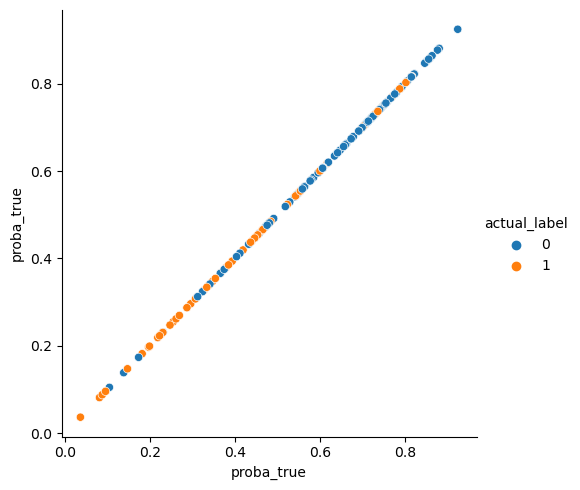

In [62]:
sns.relplot(data = graph_df, x = 'proba_true', y = 'proba_true', hue = 'actual_label')

In [84]:
titanic = acquire.get_titanic_data()

In [85]:


titanic.drop(columns = ['Unnamed: 0', 'passenger_id', 'sibsp', 'parch', 'embarked', 'class',
                        'deck', 'embark_town', 'alone',], inplace = True)

In [87]:
titanic = titanic.dropna()

In [88]:
dummy_df = pd.get_dummies(titanic['sex'], dummy_na=False, drop_first=[True])
titanic = pd.concat([titanic, dummy_df], axis=1)

In [89]:
titanic.drop(columns = 'sex', inplace = True)

In [90]:
def train_val_test(df, target, seed=42):
    
    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[target])
    
    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[target])
    
    return train, val, test

In [91]:
train, val, test = train_val_test(titanic, 'survived')

In [92]:
x_train = train.drop(columns = 'survived')
y_train = train['survived']

x_val = train.drop(columns = 'survived')
y_val = train['survived']

x_test = train.drop(columns = 'survived')
y_test = train['survived']

In [94]:
y_pred = logit.fit(x_train, y_train)

In [98]:
logit.predict_proba(x_train)

array([[0.86945613, 0.13054387],
       [0.66027427, 0.33972573],
       [0.90600937, 0.09399063],
       [0.97897262, 0.02102738],
       [0.66375809, 0.33624191],
       [0.05006245, 0.94993755],
       [0.77375704, 0.22624296],
       [0.64691411, 0.35308589],
       [0.24330605, 0.75669395],
       [0.8735127 , 0.1264873 ],
       [0.05777994, 0.94222006],
       [0.20444613, 0.79555387],
       [0.44727122, 0.55272878],
       [0.89950614, 0.10049386],
       [0.117361  , 0.882639  ],
       [0.09676244, 0.90323756],
       [0.66855261, 0.33144739],
       [0.80407268, 0.19592732],
       [0.21053869, 0.78946131],
       [0.93319789, 0.06680211],
       [0.04826598, 0.95173402],
       [0.70764384, 0.29235616],
       [0.16674018, 0.83325982],
       [0.04469952, 0.95530048],
       [0.43563468, 0.56436532],
       [0.9457618 , 0.0542382 ],
       [0.82090789, 0.17909211],
       [0.87754838, 0.12245162],
       [0.87004324, 0.12995676],
       [0.88146683, 0.11853317],
       [0.

In [100]:
logit.score(x_train, y_train)

0.8056112224448898

In [101]:
logit.score(x_val, y_val)

0.8056112224448898